In [1]:
import FunctionsLibrary as fn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Network Classification

### Wisconsin Breast Cancer Data

In [2]:
# Breast Cancer data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# One-hot encoded
Y = fn.to_categorical_numpy(y)

# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Scaling
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
n_categories = Y.shape[1]
n_features = X.shape[1]
print("Number of categories:", n_categories)
print("Number of features:", n_features)

Number of categories: 2
Number of features: 30


Initilizing Weights...
Starting Training...
Cost function after epoch 10: 0.8516644237304565
Cost function after epoch 20: 0.5686062662606386
Cost function after epoch 30: 0.341936136234694
Cost function after epoch 40: 0.15318430027851115
Cost function after epoch 50: 0.11447953056081488
Cost function after epoch 60: 0.0979415248739183
Cost function after epoch 70: 0.08716435147811827
Cost function after epoch 80: 0.07942695161358233
Cost function after epoch 90: 0.07259687063691106
Cost function after epoch 100: 0.06662893177157862


C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:477: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


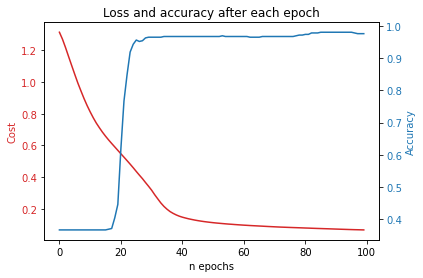

In [4]:
hidden_layers = [('relu',0),('relu',0.01),'softmax']
layer_dims=[n_features,6,4,n_categories]
NNclassifier = fn.NN(layer_dims=layer_dims,
                     hidden_layers=hidden_layers,
                     cost_function="CrossEntropy",
                     optimization_method = "Adam",
                     batch_size = 32,
                     max_epoch=100, 
                     verbose=1, 
                     penalty="l2",
                     lamb=0.1,
                     learning_rate=0.001)
NNclassifier.fit(X_train_scaled.T,Y_train.T)
NNclassifier.metric_plot()

In [5]:
Y_tilde = NNclassifier.predict(X_train_scaled.T)
Y_pred = NNclassifier.predict(X_test_scaled.T)

NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 0.976
NN Testing accuracy: 0.991


## MNIST data 

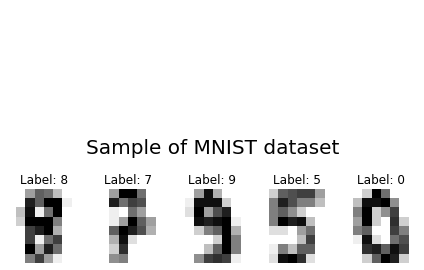

In [6]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)

# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.suptitle(" \n\n\n\n\n\nSample of MNIST dataset", fontsize=20)
plt.tight_layout()
plt.show()


In [7]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
"""
# Reshaping to fit into the Neural Network
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T
"""

'\n# Reshaping to fit into the Neural Network\nX_train, X_test = X_train.T, X_test.T\nY_train, Y_test = Y_train.T, Y_test.T\n'

### NN for classification

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 0.21191613441521118
Cost function after epoch 20: 0.04290050891493944
Cost function after epoch 30: 0.0387624227058933
Cost function after epoch 40: 0.0016112955024376137
Cost function after epoch 50: 0.0007902988702770692
Cost function after epoch 60: 0.0006149640441105546
Cost function after epoch 70: 0.0005424819216096674
Cost function after epoch 80: 0.0005039890109523439
Cost function after epoch 90: 0.0004795242488677293
Cost function after epoch 100: 0.0004611747597286994


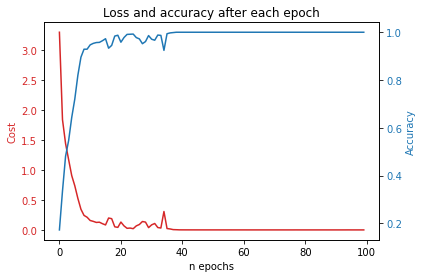

In [8]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = fn.NN(layer_dims=layer_dims, 
                     hidden_layers=hidden_layers, 
                     cost_function='CrossEntropy',
                     optimization_method = "Adam",
                     batch_size = 32, 
                     max_epoch=100, 
                     penalty="l2",
                     lamb=0.01,
                     verbose=1, 
                     learning_rate=0.01)
NNclassifier.fit(X_train.T, Y_train.T)
NNclassifier.metric_plot()

In [9]:
Y_tilde = NNclassifier.predict(X_train.T)
Y_pred = NNclassifier.predict(X_test.T)

NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 1.000
NN Testing accuracy: 0.964


### Comparing with Tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


tf_classifier = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.LeakyReLU(alpha=0.001),
    tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# Compiling
opt = tf.keras.optimizers.Adam(lr=0.01)

tf_classifier.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tf_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1437, 20)          1300      
_________________________________________________________________
dense_1 (Dense)              (None, 1437, 10)          210       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1437, 10)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 1437, 10)          110       
Total params: 1,620
Trainable params: 1,620
Non-trainable params: 0
_________________________________________________________________


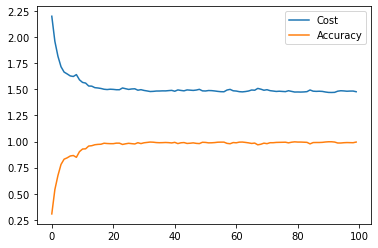

In [11]:
# Fitting
history = tf_classifier.fit(X_train, Y_train, epochs=100, batch_size=32,verbose=0)
plt.plot(history.history["loss"], label="Cost")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()

In [12]:
# Making predictions
Y_tilde = tf_classifier.predict(X_train)
Y_pred = tf_classifier.predict(X_test)

#Printing Scores
NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=1))
NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=1))
print("tf. NN Training accuracy: %.3f" % NN_train_acc )
print("tf. NN Testing accuracy: %.3f" % NN_test_acc )


tf. NN Training accuracy: 0.997
tf. NN Testing accuracy: 0.953


### Dependance of MNIST NN on different increasing l2 penalty term

In [13]:
# Looping over different lambdas
lamb_array = np.logspace(-5,3,20)
mean_counter = 20
train_acc = np.zeros(lamb_array.shape)
test_acc = np.zeros(lamb_array.shape)

hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]
for i in range(len(lamb_array)):
    NNclassifier_lambda = fn.NN(layer_dims=layer_dims, 
                         hidden_layers=hidden_layers, 
                         cost_function='CrossEntropy',
                         optimization_method = "Adam",
                         batch_size = 32, 
                         max_epoch=100, 
                         penalty="l2",
                         lamb=lamb_array[i],
                         verbose=0, 
                         learning_rate=0.01)
    NNclassifier_lambda.fit(X_train.T, Y_train.T)
    Y_tilde = NNclassifier_lambda.predict(X_train.T)
    Y_pred = NNclassifier_lambda.predict(X_test.T)
    train_acc[i] = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
    test_acc[i] = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
    
    # Plotting loss and accuracy after each epoch
    #NNclassifier.metric_plot()


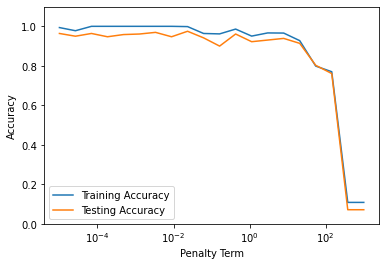

In [14]:
plt.plot(lamb_array, train_acc, label="Training Accuracy")
plt.plot(lamb_array, test_acc, label="Testing Accuracy")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.xlabel("Penalty Term")
plt.ylim(0,1.1)
plt.legend()

## Testing more intercatively with showing example image and then feeding it into the Neural Network

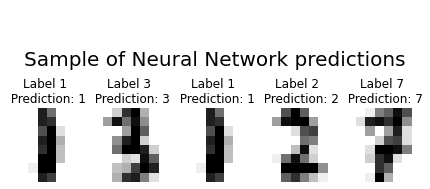

In [15]:
## Selecting a figure
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)

fig = plt.figure()
for i, img in enumerate(X_test[random_indices]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    pred_int = np.argmax(NNclassifier.predict(img.reshape(-1,1)), axis=0)[0]
    label_digit = np.argmax(Y_test[random_indices[i],:], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Neural Network predictions", fontsize=20)
plt.show()

# Logistic regression on the MNIST data

In [16]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)


X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

### Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the model and fitting the data into the Multi-Class Logistic Regression Classifier

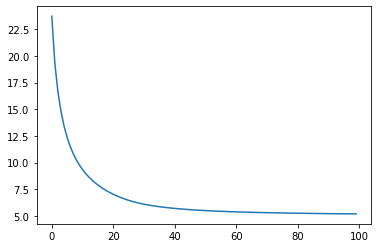

In [18]:

logit_mnist = fn.logisticmulticlass(X_train_scaled, Y_train,
                                    optimization_method="Adam",
                                    learning_rate = 0.001, 
                                    batch_size = 32,
                                    max_epoch=100,
                                    penalty="l2",
                                    lamb=0)

logit_mnist.fit(X_train_scaled, Y_train)
plt.plot(logit_mnist.costs)


In [19]:
Y_tilde = logit_mnist.predict(X_train_scaled)
Y_pred = logit_mnist.predict(X_test_scaled)

logist_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=1))
logist_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=1))
print("Logistic Training accuracy: %.3f" % logist_train_acc )
print("Logistic accuracy: %.3f" % logist_train_acc )

Logistic Training accuracy: 0.928
Logistic accuracy: 0.928


Text(0.5, 1.0, 'Logistic Regression\n Confusion Matrix')

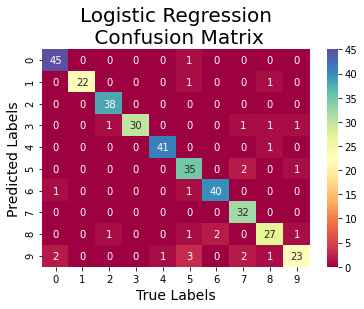

In [20]:
#Import needed libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_testlabel = np.argmax(Y_test, axis=1)
y_predlabel = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(y_testlabel, y_predlabel)
#tn, fp, fn, tp = confusion_matrix(y_testlabel, y_predlabel).ravel()
#cm = [[tp,fp],[fn,tn]]
 
#Plot the matrix
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral")
 
# labels, title and ticks
plt.xlabel('True Labels', fontsize=14)
plt.ylabel('Predicted Labels', fontsize=14) 
plt.title('Logistic Regression\n Confusion Matrix', fontsize=20)

### Comparing with sci-kit learn implementation

In [21]:
from sklearn.linear_model import LogisticRegression
scikit_logreg = LogisticRegression()
clf = scikit_logreg.fit(X_train_scaled, np.argmax(Y_train, axis=1))

In [22]:
Y_tilde_scikit = scikit_logreg.predict(X_train_scaled)
Y_pred_scikit = scikit_logreg.predict(X_test_scaled)

train_acc_scikit = fn.accuracy(Y_train, Y_tilde_scikit)
test_acc_scikit = fn.accuracy(Y_test, Y_pred_scikit)
print("SciKit Learn Logistic Training accuracy: %.3f" % train_acc_scikit )
print("SciKit Learn Logistic accuracy: %.3f" % test_acc_scikit )

SciKit Learn Logistic Training accuracy: 0.998
SciKit Learn Logistic accuracy: 0.983


### Comparing different optimizers

In [23]:
opt = ["SGD", "SGDM", "RMSprop", "Adam"]
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNcost = []
Logcost = []

for i in range(len(opt)):
    print("\nChoosing optimizer: ", opt[i])
    
    # Neural network
    NNclassifier = fn.NN(layer_dims=layer_dims, hidden_layers=hidden_layers, cost_function='CrossEntropy',
                         optimization_method = opt[i],
                         batch_size = 32, 
                         max_epoch=100, 
                         penalty="l2",
                         lamb=0,
                         verbose=0, 
                         learning_rate=0.01)
    
    NNclassifier.fit(X_train_scaled.T, Y_train.T)
    Y_tilde = NNclassifier.predict(X_train_scaled.T)
    Y_pred = NNclassifier.predict(X_test_scaled.T)
    NNcost.append(NNclassifier.costs)
    
    # Printing scores
    NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
    NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
    print("NN Training accuracy: %.3f" % NN_train_acc )
    print("NN Testing accuracy: %.3f" % NN_test_acc )
    
    # Logistic Regression
    logit_mnist = fn.logisticmulticlass(X_train_scaled, Y_train,
                                        optimization_method=opt[i],
                                        learning_rate = 0.01, 
                                        batch_size = 32,
                                        max_epoch=100,
                                        penalty="l2",
                                        lamb=0)
    
    logit_mnist.fit(X_train_scaled, Y_train)
    Y_tilde = logit_mnist.predict(X_train_scaled)
    Y_pred = logit_mnist.predict(X_test_scaled)
    Logcost.append(logit_mnist.costs)
    
    # Printing scores
    logist_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=1))
    logist_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=1))
    print("Logistic Training accuracy: %.3f" % logist_train_acc )
    print("Logistic accuracy: %.3f" % logist_train_acc )


Choosing optimizer:  SGD
NN Training accuracy: 0.991
NN Testing accuracy: 0.967


C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:113: RuntimeWarning: overflow encountered in exp
  cost = -np.sum( np.multiply(y,X.dot(beta))-np.log(np.ones((N,C))+np.exp(X.dot(beta)) ))/N
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:402: RuntimeWarning: overflow encountered in exp
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:402: RuntimeWarning: invalid value encountered in true_divide
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))


Logistic Training accuracy: 0.913
Logistic accuracy: 0.913

Choosing optimizer:  SGDM
NN Training accuracy: 0.128
NN Testing accuracy: 0.103
Logistic Training accuracy: 0.887
Logistic accuracy: 0.887

Choosing optimizer:  RMSprop
NN Training accuracy: 0.994
NN Testing accuracy: 0.958
Logistic Training accuracy: 0.905
Logistic accuracy: 0.905

Choosing optimizer:  Adam
NN Training accuracy: 1.000
NN Testing accuracy: 0.981
Logistic Training accuracy: 0.913
Logistic accuracy: 0.913


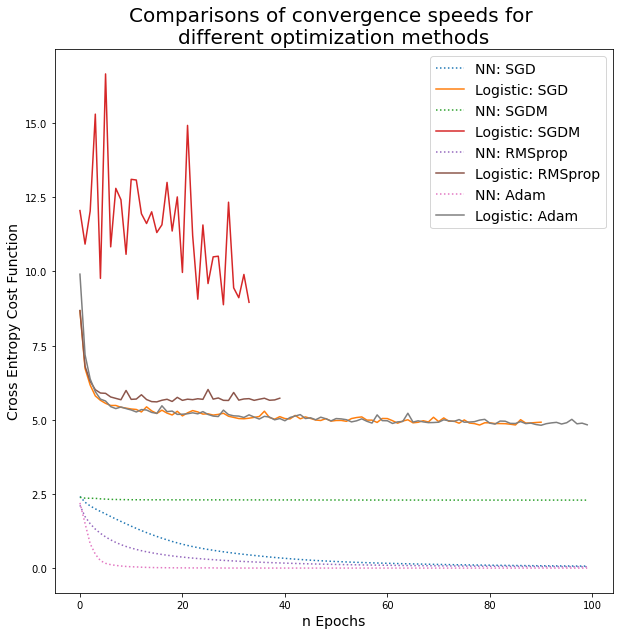

In [24]:
fig = plt.figure()
for i in range(len(opt)):
    plt.plot(NNcost[i], ls="dotted",label="NN: "+opt[i])
    plt.plot(Logcost[i], label="Logistic: "+opt[i])
plt.legend(fontsize=14)
plt.xlabel("n Epochs",fontsize=14)
plt.ylabel("Cross Entropy Cost Function", fontsize=14)
plt.title("Comparisons of convergence speeds for \ndifferent optimization methods", fontsize=20)
fig.set_size_inches(10,10, forward=True)
#plt.yscale("log")

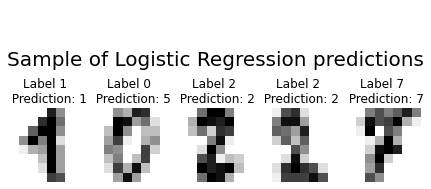

In [25]:
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)
fig = plt.figure()
for i, img in enumerate(X_test[random_indices,:]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    prediction = logit_mnist.predict(img)
    pred_int = np.argmax(prediction, axis=0)
    label_digit = np.argmax(Y_test[random_indices[i],:], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Logistic Regression predictions", fontsize=20)
plt.show()

# Using the same class for regression:

In [26]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [27]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x, y = np.meshgrid(x,y) 
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

In [28]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) 

n_features = X.shape[0]
n_categories = 1

In [29]:
NNregression = fn.NN(layer_dims=[X.shape[0],10,10,1], 
                      hidden_layers=["sigmoid","sigmoid","linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=100, 
                      verbose=1, learning_rate=0.01)

In [30]:
NNregression.fit(X,z)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 48.56858657698139
Cost function after epoch 20: 19.481965276106184
Cost function after epoch 30: 13.212262175758223
Cost function after epoch 40: 5.2954618856737365
Cost function after epoch 50: 3.5615963760681693
Cost function after epoch 60: 2.0119444338972836
Cost function after epoch 70: 1.8403034662897406
Cost function after epoch 80: 1.5579163401270721
Cost function after epoch 90: 1.5013407242009684
Cost function after epoch 100: 1.6070283805705587


Text(0.5, 0, 'Epochs')

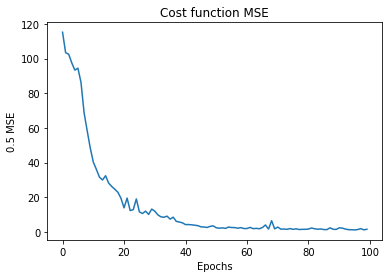

In [31]:
plt.plot(NNregression.costs)
plt.title("Cost function MSE")
plt.ylabel("0.5 MSE")
plt.xlabel("Epochs")

In [32]:
z_pred = NNregression.predict(X)

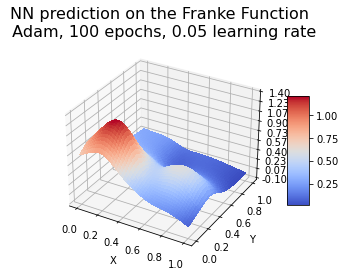

In [33]:
fn.frankeplot(z_pred.reshape(datapoints,datapoints),
              "NN prediction on the Franke Function \n Adam, 100 epochs, 0.05 learning rate")

# Terrain data

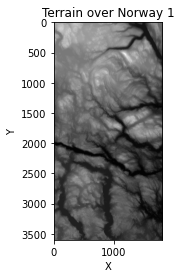

In [34]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import os
# Load the terrain
dir = r"C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\Dataset"
terrain1 = imread(os.path.join(dir,"SRTM_data_Norway.tif"))
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


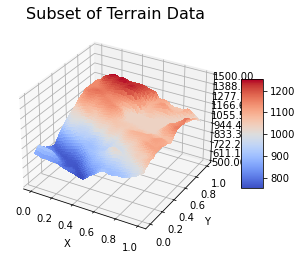

In [78]:
# Initializing the data
x_start, x_end = 800,900
y_start, y_end = 500,600


Z =  np.array(terrain1[y_start:y_end,x_start:x_end])

datapoints,_ = Z.shape

x = np.linspace(0,1,datapoints)
y = np.linspace(0,1,datapoints)
x,y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Subset of Terrain Data", fontsize = 16)
ax.set_zlim(500,1500)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [79]:
X = np.array([np.ravel(x), np.ravel(y)]).T
Z = Z.reshape(datapoints**2,1) 
n_features = X.shape[1]
n_categories = 1

In [80]:
X_train, X_test, Z_train, Z_test = train_test_split(X,Z, test_size=0.2)
scaler = StandardScaler()
scaler.fit(Z_train)
Z_train_scaled = scaler.transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)


Initilizing Weights...
Starting Training...
Cost function after epoch 20: 64.54126397475022
Cost function after epoch 40: 41.65025377700789
Cost function after epoch 60: 28.996620600412037
Cost function after epoch 80: 30.130506701585816
Cost function after epoch 100: 36.71760124790089
Cost function after epoch 120: 25.47920353630698
Cost function after epoch 140: 27.818437890641768
Cost function after epoch 160: 24.393853396017306
Cost function after epoch 180: 19.832938961282046
Cost function after epoch 200: 22.37286104758559
Training MSE: 0.006
Testin MSE: 0.006
Training R2: 0.994
Testin R2: 0.994


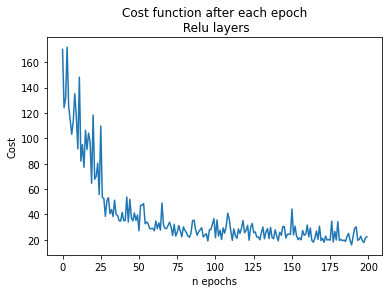

In [84]:
NNregression = fn.NN(layer_dims=[n_features,100,50,n_categories], 
                      hidden_layers= [("relu",0.001),("relu", 0.1),"linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=200, 
                      verbose=1, learning_rate=0.01)
NNregression.fit(X_train.T,Z_train_scaled.T)
plt.plot(NNregression.costs)
plt.title("Cost function after each epoch\n Relu layers")
plt.ylabel("Cost")
plt.xlabel("n epochs")
plt.savefig("terraincostrelu") 
Z_tilde = NNregression.predict(X_train.T)
Z_pred = NNregression.predict(X_test.T)

MSE_train = fn.MSE(Z_train_scaled, Z_tilde.T)
MSE_test = fn.MSE(Z_test_scaled, Z_pred.T)
R2_train = fn.R2(Z_train_scaled, Z_tilde.T)
R2_test = fn.R2(Z_test_scaled, Z_pred.T)

print("Training MSE: %.3f" % MSE_train )
print("Testin MSE: %.3f" % MSE_test )
print("Training R2: %.3f" % R2_train )
print("Testin R2: %.3f" % R2_test )

Initilizing Weights...
Starting Training...
Cost function after epoch 20: 88.81569721555223
Cost function after epoch 40: 56.96279862715832
Cost function after epoch 60: 44.11482977448494
Cost function after epoch 80: 32.66322624234949
Cost function after epoch 100: 31.095042790169202
Cost function after epoch 120: 30.635866128713367
Cost function after epoch 140: 28.725679471042213
Cost function after epoch 160: 26.388864671239364
Cost function after epoch 180: 22.911782284902735
Cost function after epoch 200: 22.896541980324614
Training MSE: 0.006
Testin MSE: 0.006
Training R2: 0.994
Testin R2: 0.994


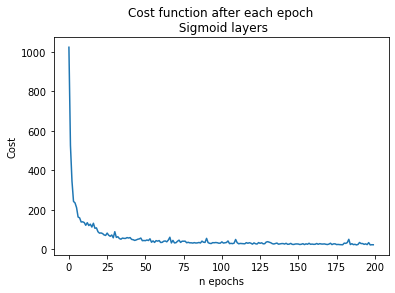

In [85]:
NNregression = fn.NN(layer_dims=[n_features,100,50,n_categories], 
                      hidden_layers=  ["sigmoid", "sigmoid", "linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=200, 
                      verbose=1, learning_rate=0.01)
NNregression.fit(X_train.T,Z_train_scaled.T)
plt.plot(NNregression.costs)
plt.title("Cost function after each epoch\n Sigmoid layers")
plt.ylabel("Cost")
plt.xlabel("n epochs")
plt.savefig("terraincostsig") 

Z_tilde = NNregression.predict(X_train.T)
Z_pred = NNregression.predict(X_test.T)

MSE_train = fn.MSE(Z_train_scaled, Z_tilde.T)
MSE_test = fn.MSE(Z_test_scaled, Z_pred.T)
R2_train = fn.R2(Z_train_scaled, Z_tilde.T)
R2_test = fn.R2(Z_test_scaled, Z_pred.T)

print("Training MSE: %.3f" % MSE_train )
print("Testin MSE: %.3f" % MSE_test )
print("Training R2: %.3f" % R2_train )
print("Testin R2: %.3f" % R2_test )

### Plot of the prediciton using Sigmoid

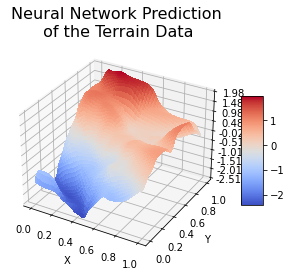

In [83]:
Z_total = NNregression.predict(X.T)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, Z_total.reshape(100,100), cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Neural Network Prediction\n of the Terrain Data", fontsize = 16)
#ax.set_zlim(500,1500)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()